In [1]:
import os 
import cebra
from cebra import CEBRA
import pandas as pd
import tables
import sys
import matplotlib.pyplot as plt

1. Load all S_aligned files and save them as hdf5

In [2]:
path = '/Users/annateruel/Desktop/results_calcium/AD22092'

for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('S_aligned.csv'):
            file_path = os.path.join(root, file)  # Get the full path to the CSV file
            # Use a key based on the relative path of the CSV file to store it in the dictionary
            key = os.path.relpath(file_path, path).replace('S_aligned.csv', '').replace(os.path.sep, '_')

            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            df = df.drop('frame', axis=1)
            df = (df>0).astype(int) #converting all numbers above 0 to 1, so that our spikes are boolean

            # Define the path to save the HDF5 file in the same directory with the same name
            h5_file_path = os.path.splitext(file_path)[0] + '.h5'

            # Save the DataFrame as an HDF5 file in the same directory
            df.to_hdf(h5_file_path, key='data', mode='w')
            
            print(f"Converted '{file}' to '{os.path.basename(h5_file_path)}' and saved in '{os.path.dirname(h5_file_path)}'")

Converted 'S_aligned.csv' to 'S_aligned.h5' and saved in '/Users/annateruel/Desktop/results_calcium/AD22092/session4'
Converted 'S_aligned.csv' to 'S_aligned.h5' and saved in '/Users/annateruel/Desktop/results_calcium/AD22092/session3'
Converted 'S_aligned.csv' to 'S_aligned.h5' and saved in '/Users/annateruel/Desktop/results_calcium/AD22092/session2'
Converted 'S_aligned.csv' to 'S_aligned.h5' and saved in '/Users/annateruel/Desktop/results_calcium/AD22092/session1'


2. Create a dictionary storing info from 4 different hdf5 files. Each file belongs to a different session. Total number of sessions: 4. 

In [3]:
import numpy as np
t = pd.read_hdf('/Users/annateruel/Desktop/results_calcium/AD22118/session2/S_aligned.h5')
t

,0,1,2,3,6,10,11,12,15,17,...,134,136,138,144,146,147,148,149,150,152
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
b = pd.read_hdf('/Users/annateruel/Desktop/results_calcium/AD22092/session2/centroid.h5')
b

bodyparts,x_centroid,y_centroid
coords,,
0,209.029538,236.578207
1,89.934133,132.861496
2,89.884705,132.887235
3,89.806270,132.865008
4,89.910925,132.817730
...,...,...
905,224.360051,311.934619
906,223.821583,310.866704
907,223.640999,308.009192


In [ ]:
path = '/Users/annateruel/Desktop/results_calcium/AD22118'
data = {}  # Create a dictionary to store data from each CSV file

for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('S_aligned.csv'):
            file_path = os.path.join(root, file)  # Get the full path to the CSV file
            # Use a key based on the relative path of the CSV file to store it in the dictionary
            key = os.path.relpath(file_path, path).replace('S_aligned.csv', '').replace(os.path.sep, '_')
            data[key] = pd.read_csv(file_path)


In [5]:
import numpy as np
nd = cebra.load_data(file='/Users/annateruel/Desktop/results_calcium/AD22092/session2/S_aligned.h5')
b = cebra.load_data(file='/Users/annateruel/Desktop/results_calcium/AD22092/session2/centroid.h5')



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### CEBRA-time 
Uses time without behaviour information

In [15]:
max_iterations = 10000 

cebra_time_model = CEBRA(model_architecture='offset10-model',  #CEBRA TIME model
                        batch_size=512,
                        learning_rate=0.05,
                        temperature=1.12,
                        output_dimension=16,
                        max_iterations=max_iterations,
                        distance='cosine',
                        conditional='time',
                        device='mps',
                        verbose=True,
                        time_offsets=10)

In [36]:
cebra_time_model.fit(nd) #training
cebra_time_model.save("cebra_time_model_ad22092_s4.pt")

  0%|          | 0/10000 [00:00<?, ?it/s]

pos:  0.2552 neg:  5.6830 total:  5.9382 temperature:  1.1200: 100%|██████████| 10000/10000 [05:25<00:00, 30.69it/s]


In [52]:
cebra_time_model = cebra.CEBRA.load("cebra_time_model_ad22092_s2.pt")
cebra_time = cebra_time_model.transform(nd)

<Axes3D: title={'center': 'CEBRA-Behavior_s1'}>

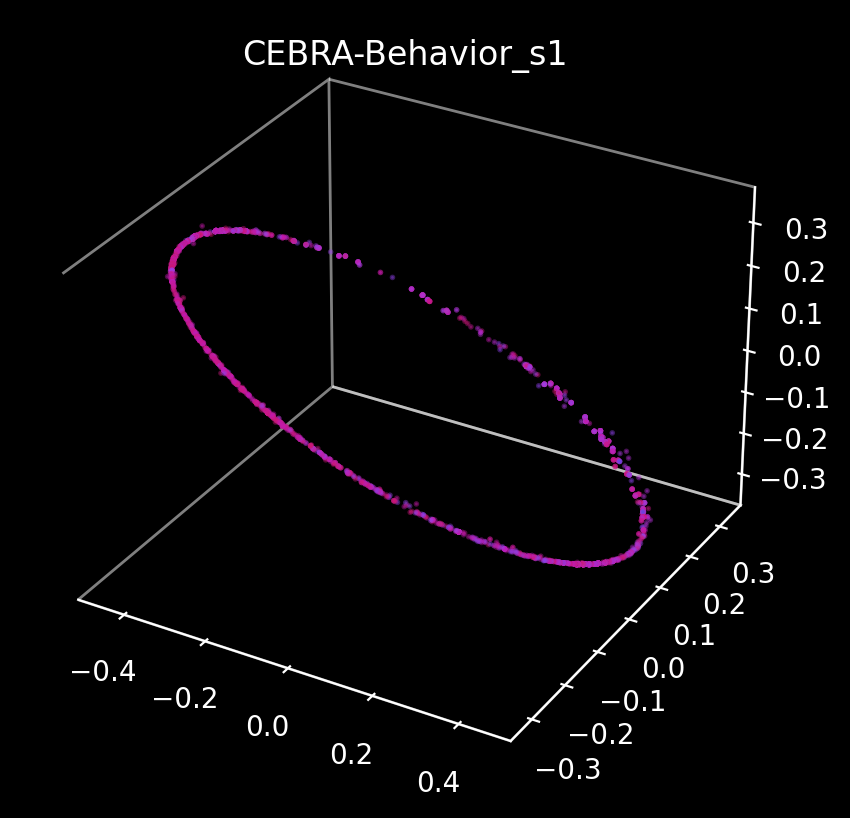

In [53]:
cebra.plot_embedding(embedding=cebra_time, embedding_labels=b[:,0], title='CEBRA-Behavior_s1', cmap='cebra', dpi = 200, markersize= 1)

In [ ]:
fig = plt.figure(figsize=(20,5))

ax1 = plt.subplot(141, projection='3d')
ax2 = plt.subplot(142, projection='3d')
ax3 = plt.subplot(143, projection='3d')

ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_time, embedding_labels=nd_s4[:,4], title='CEBRA-Time Session4')
ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_time, embedding_labels=nd_s4[:,50], title='CEBRA-Time Session4')
ax3=cebra.plot_embedding(ax=ax3, embedding=cebra_time, embedding_labels=nd_s4[:,1], title='CEBRA-Time Session4')




### CEBRA-behavior

Train a model that uses positional (pose estimation) information

Now we
 want to run CEBRA BEHAVIOR, thus we need to use as labels our behavior from dlc, which are different h5 files. To do so, we need to merge with `pd.merge` all h5 files from dlc, because since during the recoridng we save a video every 1000 frames, we need to get one single file.

In [ ]:
h5_dir = '/Volumes/ANNA_HD/ANALYSIS/minian/AD22-118/'

for session_dir in os.listdir(h5_dir):
    session_path = os.path.join(h5_dir, session_dir)
    
    # Check if the item in the root directory is a directory itself
    if os.path.isdir(session_path):
        dlc_output_dir = os.path.join(session_path, 'dlc')  # Path to "dlc" output directory
        
        if os.path.exists(dlc_output_dir) and os.path.isdir(dlc_output_dir):
            # Initialize an empty list to store DataFrames for this session
            dataframes = []
            
            # Loop through h5 files in the "dlc" output directory
            for h5_file in os.listdir(dlc_output_dir):
                if h5_file.startswith("._"):
                    file_path = os.path.join(dlc_output_dir, h5_file)
                    os.remove(file_path)
                elif h5_file.endswith('filtered.h5'):
                    h5_file_path = os.path.join(dlc_output_dir, h5_file)

                    # Read the h5 file into a DataFrame
                    df = pd.read_hdf(h5_file_path)
                    # Append the DataFrame to the list
                    dataframes.append(df)
            
            if dataframes:
                # Merge all DataFrames in this session into a single DataFrame
                merged_df = pd.concat(dataframes, axis=0)
                
                # Define the path to save the merged h5 file in the session directory
                output_h5_path = os.path.join(session_path, 'merged_output.h5')
                
                # Save the merged DataFrame as an h5 file
                merged_df.to_hdf(output_h5_path, key='data', mode='w')
                
                print(f"Merged data saved to '{output_h5_path}' in session '{session_dir}'")
        



Calculate the centroid, to use centroid position in space as your label, because we're interested in position among space. 

In [ ]:
behavior = pd.read_hdf('/Users/annateruel/Desktop/results_calcium/AD22092/session1/merged_output.h5')
df = behavior.loc[:,('DLC_resnet50_ca2+imgJan30shuffle1_500000')]
df['x_centroid'] = np.mean(df.loc[:,(slice(None), 'x')], axis=1)
df['y_centroid'] = np.mean(df.loc[:,(slice(None), 'y')], axis=1)
df2 = df[['x_centroid', 'y_centroid']]
df2.to_hdf('/Users/annateruel/Desktop/results_calcium/AD22092/session1/centroid.h5', key='data', mode='w')

In [234]:
import numpy as np
nd = cebra.load_data(file='/Users/annateruel/Desktop/results_calcium/AD22092/session4/S_aligned.h5')
b = cebra.load_data(file='/Users/annateruel/Desktop/results_calcium/AD22092/session4/centroid.h5')


'time_delta' means we will use CEBRA-Behavior mode and use auxiliary behavior variable for the model training.

In [227]:
max_iterations = 10000 

cebra_behavior_model = CEBRA(model_architecture='offset10-model',
                        batch_size=512,
                        learning_rate=0.05,
                        temperature=1,
                        output_dimension=16,
                        max_iterations=max_iterations,
                        distance='cosine',
                        conditional='time_delta',
                        device='mps',
                        verbose=True,
                        time_offsets=10)

In [235]:
cebra_behavior_model.fit(nd, b)
cebra_behavior_model.save("cebra_behavior_model_ad22092_s4.pt")


pos:  0.3364 neg:  5.7857 total:  6.1221 temperature:  1.0000: 100%|██████████| 10000/10000 [05:29<00:00, 30.32it/s]


In [194]:
cebra_behavior_model = cebra.CEBRA.load("cebra_behavior_model_ad22092_s1.pt")
cebra_behavior = cebra_behavior_model.transform(nd)

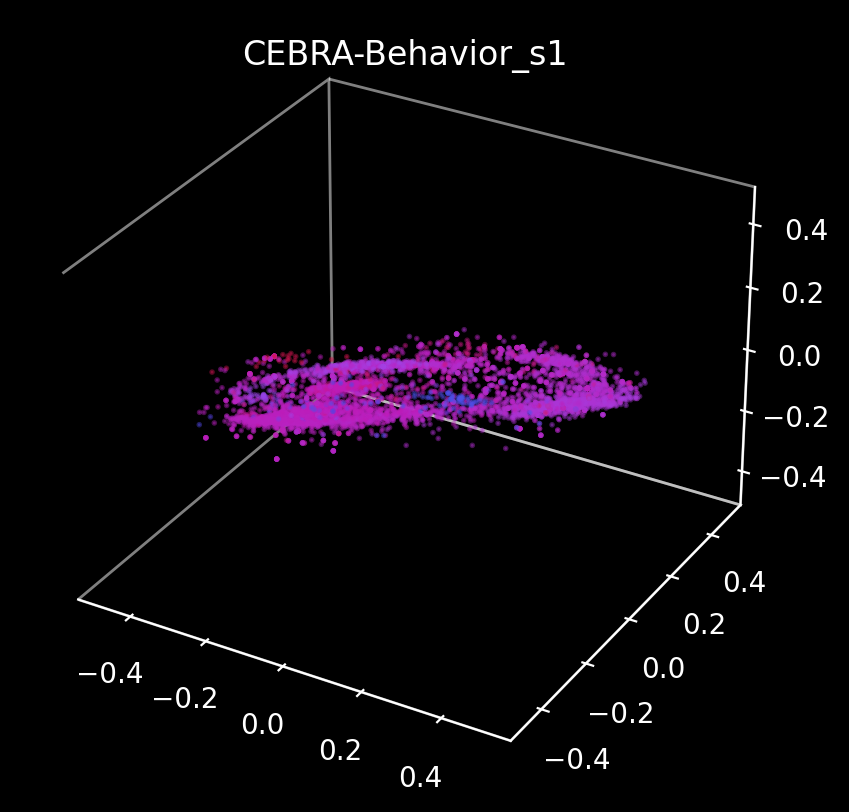

In [195]:
plt.style.use('dark_background')  # plots with black background
cebra.plot_embedding(embedding=cebra_behavior, embedding_labels=b[:,0], title='CEBRA-Behavior_s1', cmap='cebra', dpi = 200, markersize= 1)
plt.savefig('/Users/annateruel/Desktop/s2.svg', format='svg')

Visualize the data: behavior and neural activity 

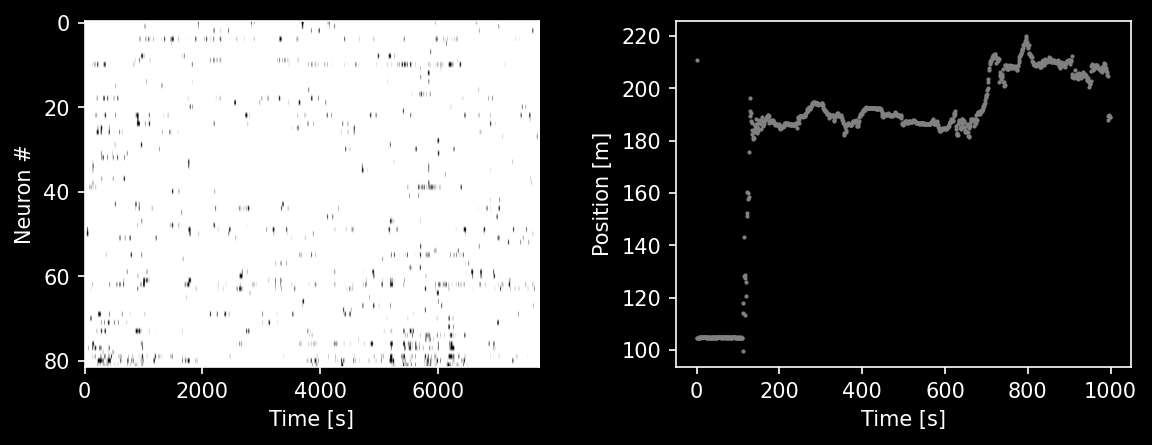

In [156]:
fig = plt.figure(figsize=(9,3), dpi=150)
plt.subplots_adjust(wspace = 0.3)
ax = plt.subplot(121)
ax.imshow(nd.T, aspect = 'auto', cmap = 'gray_r')
plt.ylabel('Neuron #')
plt.xlabel('Time [s]')

ax2 = plt.subplot(122)
ax2.scatter(np.arange(1000), b[:1000,0], c = 'gray', s=1)
plt.ylabel('Position [m]')
plt.xlabel('Time [s]')
plt.show()

In [41]:
import os
import numpy as np
dir = '/Users/annateruel/Desktop/results_calcium/'
file_list = [files for files in os.listdir(dir) if files.endswith('.pt')]
file_list = np.sort(file_list)
file_list

array(['cebra_time_model_ad22092_s1.pt', 'cebra_time_model_ad22092_s2.pt',
       'cebra_time_model_ad22092_s3.pt', 'cebra_time_model_ad22092_s4.pt'],
      dtype='<U30')

In [42]:
root_directory = '/Users/annateruel/Desktop/results_calcium/AD22092'
file_directories = []
for root, dirs, files in os.walk(root_directory):
    for file in files:
        if file == 'S_aligned.h5':
            # Append the directory path to the list
            file_path = os.path.join(root, file)
            file_directories.append(file_path)
calcium_file = np.sort(file_directories)
calcium_file 

root_directory = '/Users/annateruel/Desktop/results_calcium/AD22092'
file_directories = []
for root, dirs, files in os.walk(root_directory):
    for file in files:
        if file == 'centroid.h5':
            # Append the directory path to the list
            file_path = os.path.join(root, file)
            file_directories.append(file_path)
beh_file = np.sort(file_directories)
beh_file 

array(['/Users/annateruel/Desktop/results_calcium/AD22092/session1/centroid.h5',
       '/Users/annateruel/Desktop/results_calcium/AD22092/session2/centroid.h5',
       '/Users/annateruel/Desktop/results_calcium/AD22092/session3/centroid.h5',
       '/Users/annateruel/Desktop/results_calcium/AD22092/session4/centroid.h5'],
      dtype='<U70')

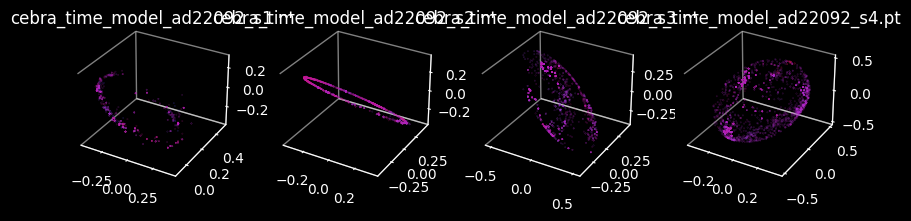

In [44]:
plt.style.use('dark_background')  # plots with black background
fig = plt.figure(figsize=(10,6))

ax1 = plt.subplot(241, projection='3d')
ax2 = plt.subplot(242, projection='3d')
ax3 = plt.subplot(243, projection='3d')
ax4 = plt.subplot(244, projection='3d')
axs_up = [ax1, ax2, ax3, ax4]

for session, dataset, dataset2, ax in zip(file_list, calcium_file, beh_file, axs_up):
    nd = cebra.load_data(file=dataset)
    b =  cebra.load_data(file=dataset2)

    cebra_behavior_model = cebra.CEBRA.load(session)
    embedding = cebra_behavior_model.transform(nd)

    ax=cebra.plot_embedding(ax=ax, embedding=embedding, embedding_labels=b[:,0], title=f"{session}", cmap='cebra', dpi = 100, idx_order=(1, 0, 2), figsize= (3, 3))
    plt.savefig('/Users/annateruel/Desktop/ad22118.pdf', format='pdf')

In [323]:
embeddings_list = []
labels = []

for session, dataset, dataset2 in zip(file_list, calcium_file, beh_file):
    nd = cebra.load_data(file=dataset)
    b = cebra.load_data(file=dataset2)

    cebra_behavior_model = cebra.CEBRA.load(session)
    cebra_behavior_embedding = cebra_behavior_model.transform(nd)

    # Append the embedding to the list
    embeddings_list.append(cebra_behavior_embedding)
    labels.append(b[:,0])



array([158.03465447, 145.01575427, 143.40884517, ..., 152.87268986,
       152.23871343, 151.61034563])

In [339]:
for i in range(4):
    if len(embeddings_list[i]) == len(labels[i]):
        print(True)
    else: 
        print(False)


True
True
True
True


In [ ]:
posdir_scores, posdir_pairs, posdir_subjects = cebra.sklearn.metrics.consistency_score(embeddings=[embeddings_list[0], embeddings_list[1]],
                                                                                       labels=[labels[0], labels[1]],
                                                                                       between="datasets")

### CEBRA-hybrid

Uses both time and positional information

In [7]:
import numpy as np
nd = cebra.load_data(file='/Users/annateruel/Desktop/results_calcium/AD22118/session4/S_aligned.h5')
b = cebra.load_data(file='/Users/annateruel/Desktop/results_calcium/AD22118/session4/centroid.h5')

In [5]:
max_iterations = 5000
cebra_hybrid_model = CEBRA(model_architecture='offset10-model',
                        batch_size=512,
                        learning_rate=0.05,
                        temperature=1,
                        output_dimension=16,
                        max_iterations=max_iterations,
                        distance='cosine',
                        conditional='time_delta',
                        device='mps',
                        verbose=True,
                        time_offsets=10,
                        hybrid = True)

In [11]:
cebra_hybrid_model.fit(nd, b)
cebra_hybrid_model.save("cebra_hybrid_model_s4.pt")

behavior_pos:  0.5417 behavior_neg:  5.4967 behavior_total:  6.0384 time_pos:  0.2524 time_neg:  5.4967 time_total:  5.7491: 100%|██████████| 5000/5000 [04:16<00:00, 19.48it/s]


In [ ]:
cebra_hybrid_model = cebra.CEBRA.load("cebra_hybrid_model.pt")
cebra_hybrid = cebra_hybrid_model.transform(nd)


In [ ]:
cebra.plot_embedding(ax=ax1, embedding=cebra_behavior, embedding_labels=b_s4[:,1], title='CEBRA-Behavior Session1', cmap='plasma')
plt.savefig('/Users/annateruel/Desktop/your_plot.svg', format='svg')

### Grid search (hyperparameter tuning)

A grid-search is the process of performing hyperparameter tuning in order to determine the optimal values of a given model. Practically, it consists in running a model on the data, by modifying the hyperparameters values at each iteration. Then, evaluating the performances of each model allows the user to select the best set of hyperparameters for its specific data.


In [22]:
import cebra
# 1. Define the parameters, either variable or fixed
params_grid = dict(
    output_dimension = [3,16],
    learning_rate = [0.005, 0.01, 0.05],
    time_offsets = 5,
    max_iterations = 500,
    device='mps',
    temperature_mode = "auto",
    verbose = False)

In [20]:
datasets = {"dataset1": nd,                     
            "dataset2": (nd, b)} 

In [23]:
grid_search = cebra.grid_search.GridSearch()
grid_search.fit_models(datasets=datasets, params=params_grid, models_dir="saved_models")

In [26]:
df_results = grid_search.get_df_results(models_dir="saved_models2")
best_model, best_model_name = grid_search.get_best_model(dataset_name="dataset2", models_dir="saved_models2")
best_model_name

'learning_rate_0.05_output_dimension_16_dataset2'